In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
from SpectralLayer import *

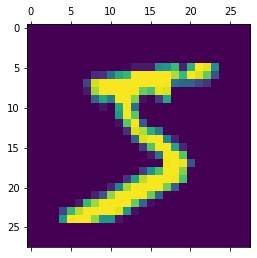

In [4]:
#data download and preprocess
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0
plt.matshow(x_train[0])
plt.show()

flat_train = np.reshape(x_train,[x_train.shape[0],28*28])
flat_test = np.reshape(x_test,[x_test.shape[0],28*28])

In [5]:
#define the layers dimensions and all the counters we will need (also reshapes the data accordingly)
L = np.array([28*28,500,80 ,10]) #layers dimensions
#blocks dimensions
s = np.zeros([L.shape[0],],dtype = np.int32)
s[0] = L[0]
for i in range(1,L.shape[0]):
    s[i] = s[i-1]+L[i]
print("Shape of the adjacency matrix:", L.sum())

#reshape train and test data to fit the correct matrix size (adds zeros at the bottom)
data = np.zeros([L.sum(),x_train.shape[0]])
data[:flat_train.shape[1]] = np.transpose(flat_train)
print("New shape of training set:", data.shape)

test = np.zeros([L.sum(),x_test.shape[0]])
test [:flat_test.shape[1]] = np.transpose(flat_test)
print("New shape of test set:", data.shape)

Shape of the adjacency matrix: 1374
New shape of training set: (1374, 60000)
New shape of test set: (1374, 60000)


In [0]:
#Build a model of 3 spectral layers according to the dimensions given previously
inputs = tf.keras.layers.Input(shape=(L.sum(),),dtype='float32') 
layer1 = SpectralLayer(s[0],s[1],L[0],L[1],L.sum(),is_base_trainable=False,activation='tanh')(inputs)
layer2 = SpectralLayer(s[1],s[2],L[1],L[2],L.sum(),is_base_trainable=True,activation='tanh')(layer1)
layer3 = SpectralLayer(s[2],s[3],L[2],L[3],L.sum(),is_base_trainable=True,activation='softmax')(layer2)

model = tf.keras.models.Model(inputs=inputs, outputs=layer3)

opt = tf.keras.optimizers.Adamax(learning_rate=0.05)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#Train for some epochs
epochs=20
history = model.fit(np.transpose(data), y_train,batch_size=4072, verbose=1, epochs=epochs)

Epoch 1/20
15/15 [==============================] - 2s 133ms/step - loss: 3.0142 - accuracy: 0.2464
Epoch 2/20
15/15 [==============================] - 2s 132ms/step - loss: 1.7584 - accuracy: 0.5167
Epoch 3/20
15/15 [==============================] - 2s 132ms/step - loss: 0.8292 - accuracy: 0.7583
Epoch 4/20
15/15 [==============================] - 2s 133ms/step - loss: 0.5132 - accuracy: 0.8445
Epoch 5/20
15/15 [==============================] - 2s 132ms/step - loss: 0.3990 - accuracy: 0.8801
Epoch 6/20
15/15 [==============================] - 2s 133ms/step - loss: 0.3407 - accuracy: 0.8993
Epoch 7/20
15/15 [==============================] - 2s 133ms/step - loss: 0.3035 - accuracy: 0.9107
Epoch 8/20
15/15 [==============================] - 2s 132ms/step - loss: 0.2763 - accuracy: 0.9194
Epoch 9/20
15/15 [==============================] - 2s 134ms/step - loss: 0.2562 - accuracy: 0.9256
Epoch 10/20
15/15 [==============================] - 2s 133ms/step - loss: 0.2380 - accuracy: 0.9308

In [8]:
tested = model.evaluate(np.transpose(test), y_test, batch_size = 100,verbose=1)
predicted = model.predict(np.transpose(test))

100/100 [==============================] - 3s 29ms/step - loss: 0.1672 - accuracy: 0.9494


Prediction:  3
Ground truth:  3


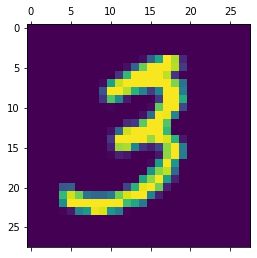

In [9]:
i = np.random.randint(10000)
print("Prediction: ", np.argmax(predicted[i]))
print("Ground truth: ", y_test[i])
plt.matshow(x_test[i])
plt.show()